In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

C:\Users\jeanl\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Just a glance

In [2]:
testSet = pd.read_csv(r"test.csv")
trainSet = pd.read_csv(r"train.csv")

In [3]:
# first impression of dataset
testSet.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1458.000000  1459.000000  1459.000000    1459.000000   
mean      ...        472.768861    93.174777    48.313914      24.243317   
std       ...        217.048611   127.744882    68.883364      67.227765   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        318.000000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    28.000000       0.000000   
75%       ...        576.000000   168.000000    72.000000       0.000000   
max       ...       1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

In [4]:
print(trainSet.columns)
print('--------------------------------------')
print(len(trainSet.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
"""
Calculate missing values in each feature. Features having more than 15% missing value could be removed in most of the case.
Unless it worth to invest more time in feature engineering.
"""

missing = trainSet.isnull().sum().sort_values(ascending=False)
missing_rate = (trainSet.isnull().sum()/trainSet.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing,missing_rate],axis=1,keys=["MissingValues","Percent"])
missing_data.head(20)

MissingValues   Percent
PoolQC                 1453  0.995205
MiscFeature            1406  0.963014
Alley                  1369  0.937671
Fence                  1179  0.807534
FireplaceQu             690  0.472603
LotFrontage             259  0.177397
GarageCond               81  0.055479
GarageType               81  0.055479
GarageYrBlt              81  0.055479
GarageFinish             81  0.055479
GarageQual               81  0.055479
BsmtExposure             38  0.026027
BsmtFinType2             38  0.026027
BsmtFinType1             37  0.025342
BsmtCond                 37  0.025342
BsmtQual                 37  0.025342
MasVnrArea                8  0.005479
MasVnrType                8  0.005479
Electrical                1  0.000685
Utilities                 0  0.000000

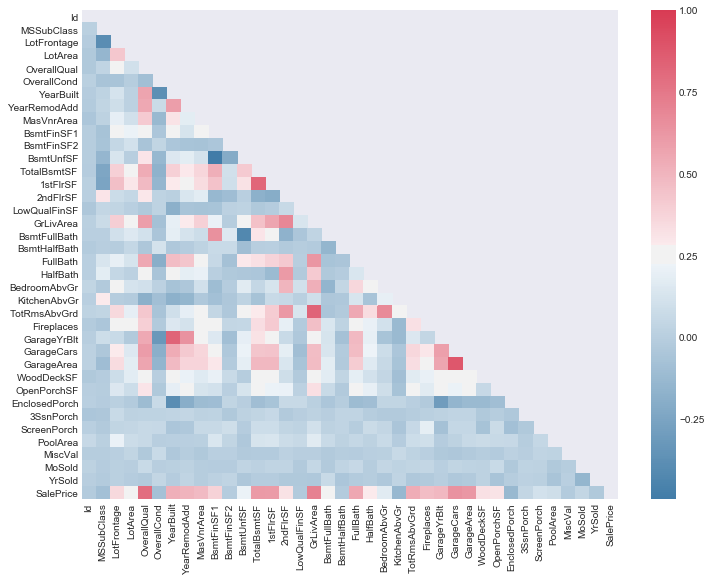

In [6]:
"""
Take a quick glance at correlation between features.
1, Highly correlative features should be combined or removed such as GarageYrBlt vs YearBlt and 1stFlrSF vs 2nd FlrSF
Otherwise, they will bring negative effect to linear based models and Bayes models.
2, SalesPrice has possitive correlation with OverallQual, GrLivArea, Garage features and FullBath...
"""

f,ax = plt.subplots(figsize=(12,9))
mask = np.zeros_like(trainSet.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 7, as_cmap=True)
sns.heatmap(trainSet.corr(),cmap=cmap,mask=mask)

In [7]:
"""
A quick skew check for each feature.
"""
trainSet.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [8]:
"""
Check a random categoric feature
"""
set(trainSet["BsmtCond"])

{nan, 'TA', 'Gd', 'Fa', 'Po'}

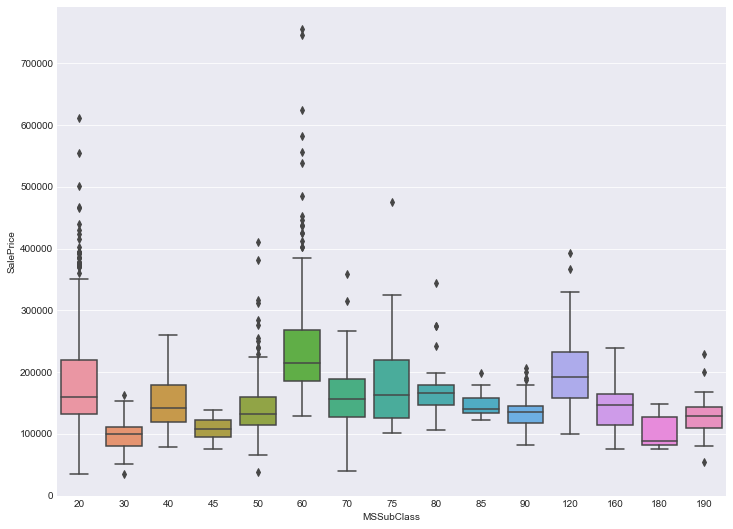

In [9]:
f,ax = plt.subplots(figsize=(12,9))
sns.boxplot(trainSet['MSSubClass'],trainSet['SalePrice'])

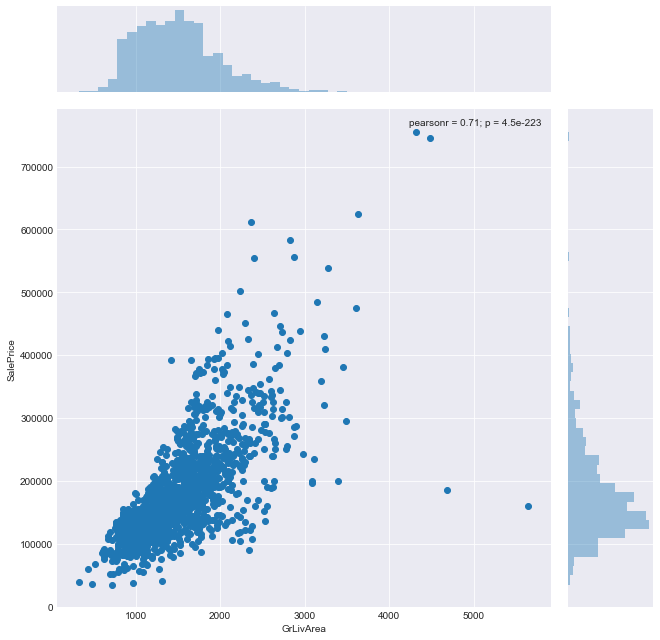

In [10]:
"""
Checked a random numerical feature and found some outliers
"""
sns.jointplot(x=trainSet['GrLivArea'],y=trainSet['SalePrice'],size=9)

# Data Preprocessing


### 1.Data imputation: deal with features having missing values

First of all, I'll try to impute missing data for features identified earlier especially for categoric features

In [11]:
# Apparently NA in PoolQC means no pool,same for PoolArea
def impute(col,value):
    trainSet[col] = trainSet[col].fillna(value)
    testSet[col] = testSet[col].fillna(value)

impute('PoolQC','No')

In [12]:
# For all following features, NA just means no such feature

impute('MiscFeature','No')

impute('Alley','None')
impute('Fence','No')

impute('FireplaceQu','No')

impute('LotFrontage',0)

impute('GarageType','No')
impute('GarageFinish','No')
impute('GarageQual','No')
impute('GarageCond','No')

impute('BsmtExposure','No')
impute('BsmtFinType2','No')
impute('BsmtFinType1','No')
impute('BsmtCond','No')
impute('BsmtQual','No')

impute('MasVnrArea',0)
impute('MasVnrType','None')

In [13]:
# just drop GarageYrBlt
trainSet.drop('GarageYrBlt',axis=1,inplace=True)
testSet.drop('GarageYrBlt',axis=1,inplace=True)

In [14]:
trainSet.isnull().sum().sort_values(ascending=False)[trainSet.isnull().sum()!=0]

Electrical    1
dtype: int64

In [15]:
testSet.isnull().sum().sort_values(ascending=False)[testSet.isnull().sum()!=0]

MSZoning        4
BsmtFullBath    2
Functional      2
Utilities       2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
SaleType        1
Exterior1st     1
Exterior2nd     1
KitchenQual     1
GarageCars      1
GarageArea      1
dtype: int64

Still have some missing value in both train and test set.Let's deal with them.

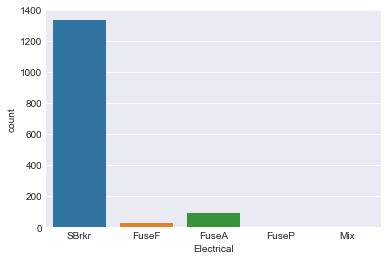

In [16]:
# Since the number of 'SBrkr' is way more than others, I'll use it to fillna
sns.countplot(trainSet['Electrical'])

In [17]:
impute('Electrical','SBrkr')

In [18]:
# Doing same thing for all other features still having missing values
impute('Electrical','RL')
impute('BsmtFullBath',0)
impute('Functional','Typ')
impute('Utilities','AllPub')
impute('BsmtHalfBath',0)
impute('BsmtFinSF1',0)
impute('BsmtFinSF2',0)
impute('BsmtUnfSF',0)
impute('TotalBsmtSF',0)
impute('SaleType','WD')
impute('Exterior1st','Vinyl')
impute('Exterior2nd','Vinyl')
impute('KitchenQual','TA')
impute('GarageCars',0)
impute('GarageArea',0)
impute('MSZoning','RL')

### 2.Data transformation step 1: from numerical to categoric

Many numerical features, such as MSSubClass as described ealier, are infact categoric.

In [19]:
trainSet['MSSubClass'] =trainSet['MSSubClass'].map(lambda x:'lvl'+str(x))
testSet['MSSubClass'] =testSet['MSSubClass'].map(lambda x:'lvl'+str(x))

In [20]:
def replace(col,content):
    trainSet[col] = trainSet[col].replace(content)
    testSet[col] = testSet[col].replace(content)

replace('MoSold',{1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"})

In [21]:
replace('Alley',{'None':0,'Grvl':1,'Pave':2})
replace('BsmtCond',{'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
replace("BsmtExposure",{"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3})
replace("BsmtFinType1",{"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6})
replace("BsmtFinType2",{"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6})
replace("BsmtQual",{"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5})
replace("ExterCond",{"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5})
replace("ExterQual",{"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5})
replace("FireplaceQu",{"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
replace("Functional",{"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8})
replace("GarageCond",{"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
replace("GarageQual",{"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
replace("HeatingQC", {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
replace("KitchenQual",{"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})
replace("LandSlope",{"Sev" : 1, "Mod" : 2, "Gtl" : 3})
replace("LotShape",{"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4})
replace("PavedDrive",{"N" : 0, "P" : 1, "Y" : 2})
replace("PoolQC",{"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4})
replace("Street",{"Grvl" : 1, "Pave" : 2})
replace("Utilities",{"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4})

### 3.Data transformation step 2: combine related features


In [22]:
def add(col1,col2,newcol):
    trainSet[newcol]=trainSet[col1]+trainSet[col2]
    testSet[newcol]=testSet[col1]+testSet[col2]

In [23]:
add('GrLivArea','TotalBsmtSF','TotalSF')
add('1stFlrSF','2ndFlrSF','TotalFlrSF')
trainSet['BathNumber'] = trainSet['BsmtFullBath']+trainSet['FullBath']+trainSet['BsmtHalfBath']*0.5+trainSet['HalfBath']*0.5
testSet['BathNumber'] = testSet['BsmtFullBath']+testSet['FullBath']+testSet['BsmtHalfBath']*0.5+testSet['HalfBath']*0.5
trainSet['AllPorchSF'] = trainSet['OpenPorchSF']+trainSet['EnclosedPorch']+trainSet['3SsnPorch']+trainSet['ScreenPorch']
testSet['AllPorchSF'] = testSet['OpenPorchSF']+testSet['EnclosedPorch']+testSet['3SsnPorch']+testSet['ScreenPorch']

### 4.Data transformation step 3: Deal with skewness

In [24]:
num = trainSet.select_dtypes(exclude=['object']).columns

In [25]:
trainSet[num].skew().abs().sort_values(ascending=False).head(15)

Utilities       38.209946
MiscVal         24.476794
PoolQC          16.851570
Street          15.518770
PoolArea        14.828374
LotArea         12.207688
3SsnPorch       10.304342
LowQualFinSF     9.011341
Functional       4.912214
LandSlope        4.813682
KitchenAbvGr     4.488397
Alley            4.289372
BsmtFinSF2       4.255261
ScreenPorch      4.122214
BsmtHalfBath     4.103403
dtype: float64

In [26]:
mostSkewed = trainSet[num].skew()[trainSet[num].skew().abs()>0.5].index
for x in mostSkewed:
    trainSet[x]=np.log1p(trainSet[x])

In [27]:
num1 = testSet.select_dtypes(exclude=['object']).columns
mostSkewed1 = testSet[num1].skew()[trainSet[num1].skew().abs()>0.5].index
for x in mostSkewed1:
    testSet[x]=np.log1p(testSet[x])

In [28]:
print(len(trainSet.columns),len(testSet.columns))

84 83


### 5.Data transformation step 4: transform categoric features to one-hot encoding


In [29]:
cat = trainSet.select_dtypes(include=['object']).columns
cat1 = testSet.select_dtypes(include=['object']).columns

In [30]:
print(len(cat),len(cat1))

25 25


In [31]:
train_dummy = pd.get_dummies(trainSet[cat])
test_dummy = pd.get_dummies(testSet[cat1])
trainSet = trainSet.join(train_dummy)
testSet = testSet.join(test_dummy)
print(len(trainSet.columns),len(testSet.columns))

284 271


In [ ]:
trainSet.drop(cat,axis=1,inplace=True)
testSet.drop(cat1,axis=1,inplace=True)

In [ ]:
print(len(trainSet.columns),len(testSet.columns))

### 6. Modelling

In [ ]:
y_train = trainSet['SalePrice']
X_train = trainSet.drop(['Id','SalePrice'],axis=1)
X_test = testSet.drop(['Id'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
LCV = LassoCV()
scale_LCV = Pipeline([('scaler',scaler),('LCV',LCV)])

cv_score = cross_val_score(scale_LCV, X_train, y_train, cv = 5, n_jobs=-1)

In [ ]:
print('CV Score is: '+ str(np.mean(cv_score)))

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

In [ ]:
class CustomEnsembleRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, regressors=None):
        self.regressors = regressors

    def fit(self, X, y):
        for regressor in self.regressors:
            regressor.fit(X, y)

    def predict(self, X):
        self.predictions_ = list()
        for regressor in self.regressors:
            self.predictions_.append((regressor.predict(X).ravel()))
        return (np.mean(self.predictions_, axis=0))

In [ ]:
xgb1 = XGBRegressor(colsample_bytree=0.2,
                 learning_rate=0.05,
                 max_depth=3,
                 n_estimators=1200
                )

xgb2 = XGBRegressor(colsample_bytree=0.2,
                 learning_rate=0.05,
                 max_depth=3,
                 n_estimators=1200,
                seed = 1234
                )

xgb3 = XGBRegressor(colsample_bytree=0.2,
                 learning_rate=0.05,
                 max_depth=3,
                 n_estimators=1200,
                seed = 1337
                )

In [ ]:
xgb_ens = CustomEnsembleRegressor([xgb1,xgb2,xgb3])

In [ ]:
cvscore = cross_val_score(cv=5,estimator=xgb1,X = X_train,y = y_train, n_jobs = -1)

In [ ]:
print('CV Score is: '+ str(np.mean(cvscore)))

In [ ]:
cvscore = cross_val_score(cv=5,estimator=xgb2,X = X_train,y = y_train, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cvscore)))

In [ ]:
cvscore = cross_val_score(cv=5,estimator=xgb3,X = X_train,y = y_train, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cvscore)))

In [ ]:
xgb_ens.fit(X_train, y_train);
scale_LCV.fit(X_train,y_train);

In [ ]:
preds_x = np.expm1(xgb_ens.predict(X_test));
preds_l = np.expm1(scale_LCV.predict(X_test));
preds = (preds_x+preds_l)/2
sub = pd.DataFrame()
sub['Id'] = testSet['Id']
sub['SalePrice'] = preds
sub.to_csv('submission.csv', index=False)

In [ ]:
cols = pd.DataFrame()
cols['train']=trainSet.columns
cols['test']=testSet.columns